<h1><center></center></h1>
<h1><center>GTC</center></h1>
<h1><center>ML Project 1</center></h1>
<h2><center>Data Cleaning & Preprocessing Challenge</center></h2>

# **Phase 1: Exploratory Data Analysis (EDA) & Data Quality Report**

Import libs

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.model_selection import train_test_split

Upload file

In [ ]:
from google.colab import files
uploaded = files.upload()

Load data

In [2]:
df = pd.read_csv('hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


Info summary

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

Describe stats

In [4]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
hotel,119390,2,City Hotel,79330,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_canceled,119390.0,NaN,NaN,NaN,0.370416,0.482918,0.0,0.0,0.0,1.0,1.0
lead_time,119390.0,NaN,NaN,NaN,104.011416,106.863097,0.0,18.0,69.0,160.0,737.0
arrival_date_year,119390.0,NaN,NaN,NaN,2016.156554,0.707476,2015.0,2016.0,2016.0,2017.0,2017.0
arrival_date_month,119390,12,August,13877,NaN,NaN,NaN,NaN,NaN,NaN,NaN
arrival_date_week_number,119390.0,NaN,NaN,NaN,27.165173,13.605138,1.0,16.0,28.0,38.0,53.0
arrival_date_day_of_month,119390.0,NaN,NaN,NaN,15.798241,8.780829,1.0,8.0,16.0,23.0,31.0
stays_in_weekend_nights,119390.0,NaN,NaN,NaN,0.927599,0.998613,0.0,0.0,1.0,2.0,19.0
stays_in_week_nights,119390.0,NaN,NaN,NaN,2.500302,1.908286,0.0,1.0,2.0,3.0,50.0
adults,119390.0,NaN,NaN,NaN,1.856403,0.579261,0.0,2.0,2.0,2.0,55.0


Missing counts

In [5]:
df.isna().sum().sort_values(ascending=False)

,0
company,112593
agent,16340
country,488
children,4
arrival_date_month,0
arrival_date_week_number,0
hotel,0
is_canceled,0
stays_in_weekend_nights,0
arrival_date_day_of_month,0


Missing plot

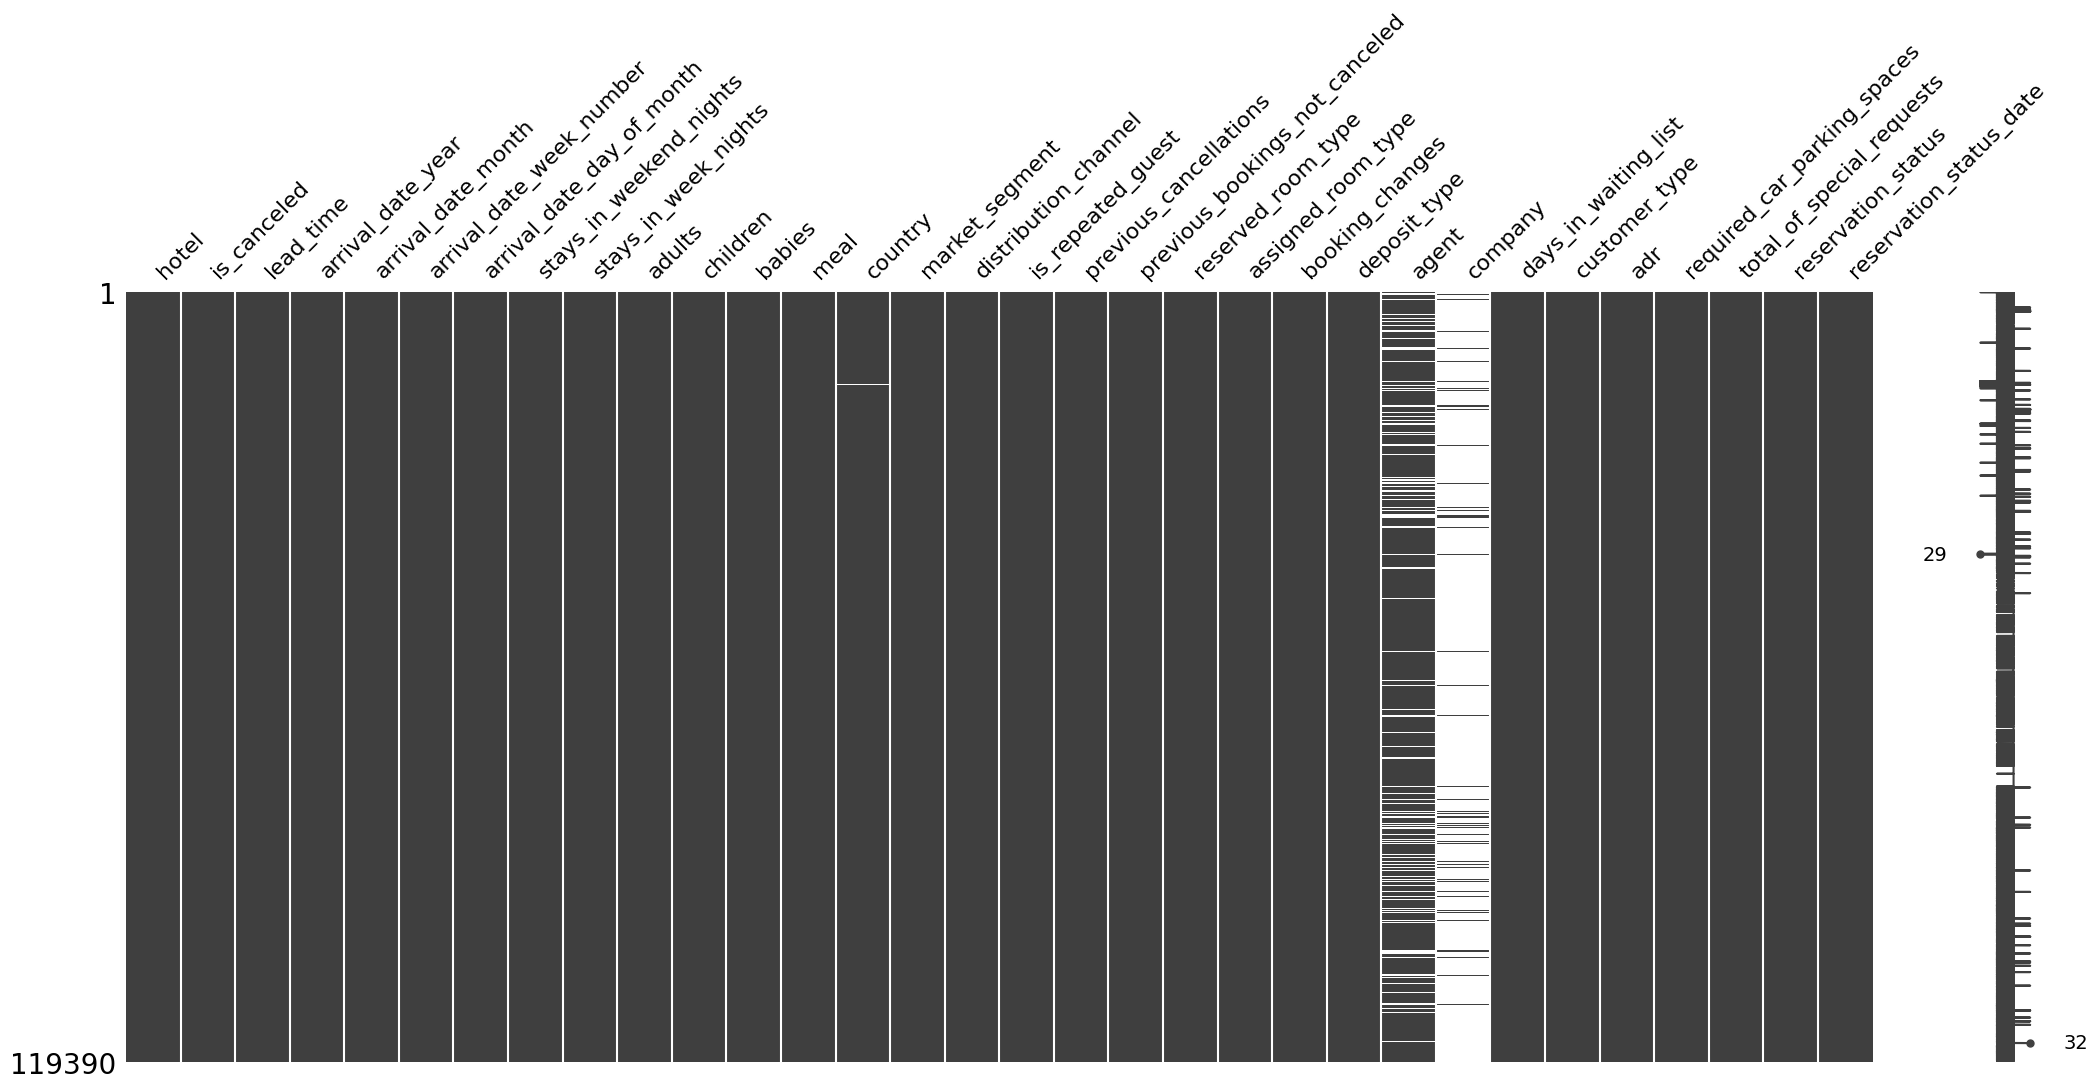

In [6]:
msno.matrix(df)
plt.show()

Boxplots view

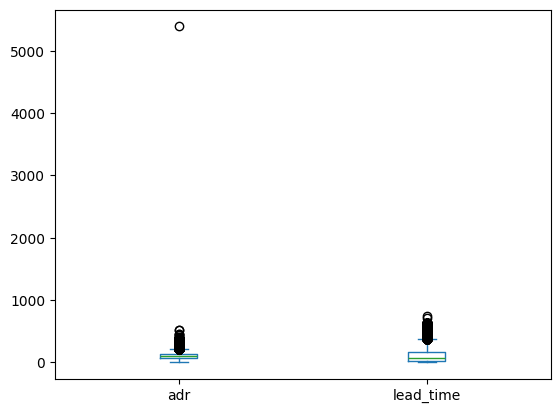

In [7]:
fig, ax = plt.subplots()
df[['adr','lead_time']].plot(kind='box', ax=ax)
plt.show()

IQR outliers

In [8]:
num_cols = ['adr','lead_time']
iqr_summary = {}
for c in num_cols:
    q1 = df[c].quantile(0.25)
    q3 = df[c].quantile(0.75)
    iqr = q3 - q1
    lo = q1 - 1.5*iqr
    hi = q3 + 1.5*iqr
    iqr_summary[c] = {'q1':q1,'q3':q3,'iqr':iqr,'low':lo,'high':hi,'outliers':((df[c]<lo)|(df[c]>hi)).sum()}
pd.DataFrame(iqr_summary).T

,q1,q3,iqr,low,high,outliers
adr,69.29,126.0,56.71,-15.775,211.065,3793.0
lead_time,18.00,160.0,142.00,-195.000,373.000,3005.0


# **Phase 2: Data Cleaning**

Fill missing

In [9]:
if 'company' in df.columns:
    df['company'] = df['company'].fillna(0)
if 'agent' in df.columns:
    df['agent'] = df['agent'].fillna(0)
if 'country' in df.columns:
    mode_country = df['country'].mode(dropna=True)
    mode_country = mode_country.iloc[0] if len(mode_country)>0 else 'Unknown'
    df['country'] = df['country'].fillna(mode_country)
if 'children' in df.columns:
    df['children'] = df['children'].fillna(df['children'].median())

Drop duplicates

In [10]:
df = df.drop_duplicates()
df.shape

(87377, 32)

Cap outliers

In [11]:
if 'adr' in df.columns:
    df.loc[df['adr']>1000,'adr'] = 1000
if 'lead_time' in df.columns:
    hi = df['lead_time'].quantile(0.99)
    df.loc[df['lead_time']>hi,'lead_time'] = hi

Fix dtypes

In [12]:
if 'reservation_status_date' in df.columns:
    df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'], errors='coerce')
if 'children' in df.columns:
    df['children'] = df['children'].round(0).astype('Int64')
if 'babies' in df.columns:
    df['babies'] = df['babies'].fillna(0).astype('Int64')
if 'adults' in df.columns:
    df['adults'] = df['adults'].fillna(0).astype('Int64')

# **Phase 3: Feature Engineering & Preprocessing**

New features

In [20]:
if set(['adults','children','babies']).issubset(df.columns):
    df['total_guests'] = df['adults'].fillna(0).astype(float) + df['children'].fillna(0).astype(float) + df['babies'].fillna(0).astype(float)

if set(['stays_in_weekend_nights','stays_in_week_nights']).issubset(df.columns):
    df['total_nights'] = df['stays_in_weekend_nights'].fillna(0).astype(float) + df['stays_in_week_nights'].fillna(0).astype(float)

if set(['children','babies']).issubset(df.columns):
    df['is_family'] = ((df['children'].fillna(0).astype(float) + df['babies'].fillna(0).astype(float))>0).astype(int)

Encode low-card

In [19]:
low_card = ['meal','market_segment','distribution_channel','deposit_type','customer_type','reserved_room_type','assigned_room_type','hotel']
low_card = [c for c in low_card if c in df.columns]
df = pd.get_dummies(df, columns=low_card, drop_first=True)
df.head()

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,country_grouped_ITA,country_grouped_NLD,country_grouped_NOR,country_grouped_Other,country_grouped_POL,country_grouped_PRT,country_grouped_ROU,country_grouped_RUS,country_grouped_SWE,country_grouped_USA
0,0,342,2015,July,27,1,0,0,2,0,...,False,False,False,False,False,True,False,False,False,False
1,0,347,2015,July,27,1,0,0,2,0,...,False,False,False,False,False,True,False,False,False,False
2,0,7,2015,July,27,1,0,1,1,0,...,False,False,False,False,False,False,False,False,False,False
3,0,13,2015,July,27,1,0,1,1,0,...,False,False,False,False,False,False,False,False,False,False
4,0,14,2015,July,27,1,0,2,2,0,...,False,False,False,False,False,False,False,False,False,False


Encode country

In [15]:
if 'country' in df.columns:
    freq = df['country'].value_counts()
    topk = freq.head(20).index
    df['country_grouped'] = np.where(df['country'].isin(topk), df['country'], 'Other')
    freq2 = df['country_grouped'].value_counts()
    df['country_freq'] = df['country_grouped'].map(freq2)
    df = df.drop(columns=['country'])
    df = pd.get_dummies(df, columns=['country_grouped'], drop_first=True)
df.head(3)

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,country_grouped_ITA,country_grouped_NLD,country_grouped_NOR,country_grouped_Other,country_grouped_POL,country_grouped_PRT,country_grouped_ROU,country_grouped_RUS,country_grouped_SWE,country_grouped_USA
0,0,342,2015,July,27,1,0,0,2,0,...,False,False,False,False,False,True,False,False,False,False
1,0,347,2015,July,27,1,0,0,2,0,...,False,False,False,False,False,True,False,False,False,False
2,0,7,2015,July,27,1,0,1,1,0,...,False,False,False,False,False,False,False,False,False,False


Drop leakage

In [16]:
leak_cols = [c for c in ['reservation_status','reservation_status_date'] if c in df.columns]
if len(leak_cols)>0:
    df = df.drop(columns=leak_cols)
df.head(3)

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,country_grouped_ITA,country_grouped_NLD,country_grouped_NOR,country_grouped_Other,country_grouped_POL,country_grouped_PRT,country_grouped_ROU,country_grouped_RUS,country_grouped_SWE,country_grouped_USA
0,0,342,2015,July,27,1,0,0,2,0,...,False,False,False,False,False,True,False,False,False,False
1,0,347,2015,July,27,1,0,0,2,0,...,False,False,False,False,False,True,False,False,False,False
2,0,7,2015,July,27,1,0,1,1,0,...,False,False,False,False,False,False,False,False,False,False


Train test split

In [17]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
train_df.shape, test_df.shape

((69901, 86), (17476, 86))

Save outputs

In [18]:
df.to_csv('hotel_bookings_cleaned_full.csv', index=False)
train_df.to_csv('train_cleaned.csv', index=False)
test_df.to_csv('test_cleaned.csv', index=False)
len(df)

87377